# TASK 5 OASIS INFOBYTE DS INTERNSHIP

The goal is to create a machine learning model that helps a business predict how changes in advertising spend, target audience, or platform will affect sales.

    The Advertising dataset contains the following columns:
        
        1.Unnamed: 0: This is an index column (row identifiers), which may not be needed for analysis.
        2.TV: The amount spent on TV advertising (in thousands of dollars).
        3.Radio: The amount spent on Radio advertising (in thousands of dollars).
        4.Newspaper: The amount spent on Newspaper advertising (in thousands of dollars).
        5.Sales: The number of units sold (response variable or target).

##### GOAL

The goal is to predict the Sales (dependent variable) based on the advertising spend across TV, Radio, and Newspaper (independent variables).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score 

In [2]:
df=pd.read_csv("C:/Users/Dubai Laptop/Advertising.csv")

In [3]:
df.head(10) 
#sales shows the number of units sold

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df=df.drop(['Unnamed: 0'] , axis=1)  # unnamed colunmn dropped


In [5]:
df.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df=df.rename(columns={"Sales":"Units_Sales"})

In [7]:
df.head()

,TV,Radio,Newspaper,Units_Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

TV             0
Radio          0
Newspaper      0
Units_Sales    0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Units_Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TV           200 non-null    float64
 1   Radio        200 non-null    float64
 2   Newspaper    200 non-null    float64
 3   Units_Sales  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


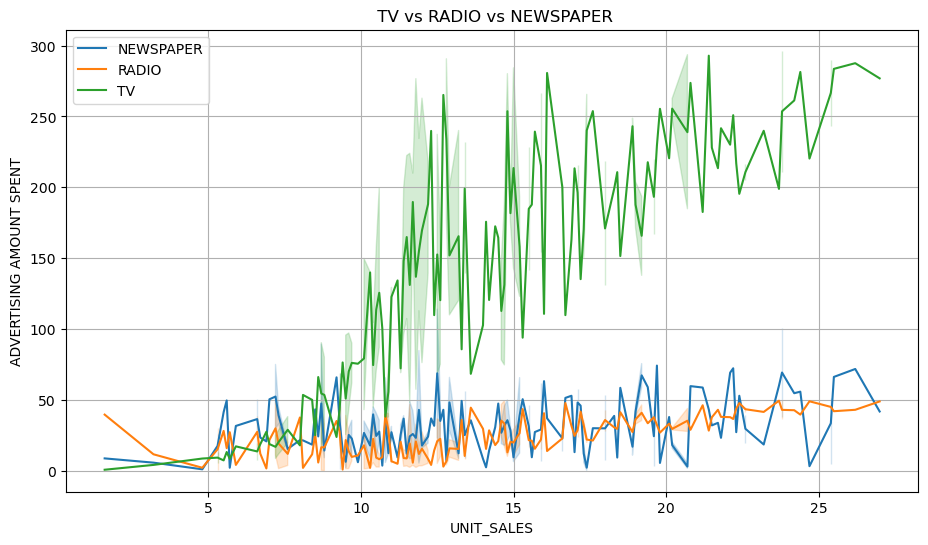

In [12]:
#line plot to differentiate between them

plt.figure(figsize=(11,6))
sns.lineplot(x=df['Units_Sales'] , y=df['Newspaper'] , data=df , label="NEWSPAPER")
sns.lineplot(x=df['Units_Sales'] , y=df['Radio'] , data=df , label="RADIO")
sns.lineplot(x=df['Units_Sales'] , y=df['TV'] , data=df ,  label="TV")
plt.title(" TV vs RADIO vs NEWSPAPER")
plt.xlabel('UNIT_SALES')
plt.ylabel('ADVERTISING AMOUNT SPENT')
plt.legend()
plt.grid()

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Units_Sales'], dtype='object')

### DETECTING OUTLIER

#### 1st method usinG BOXPLOT

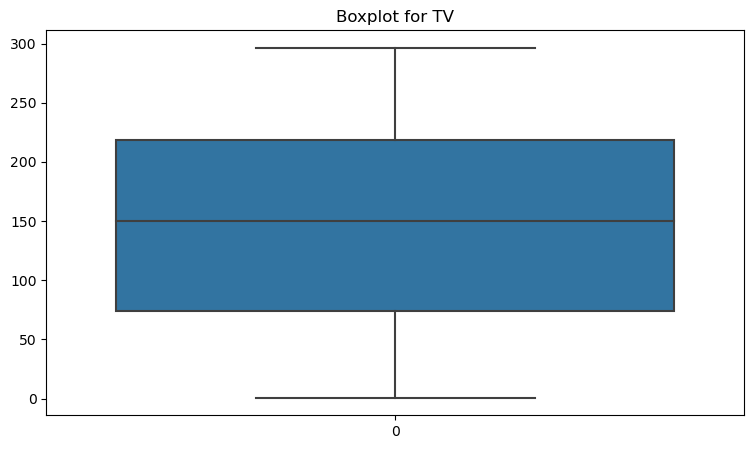

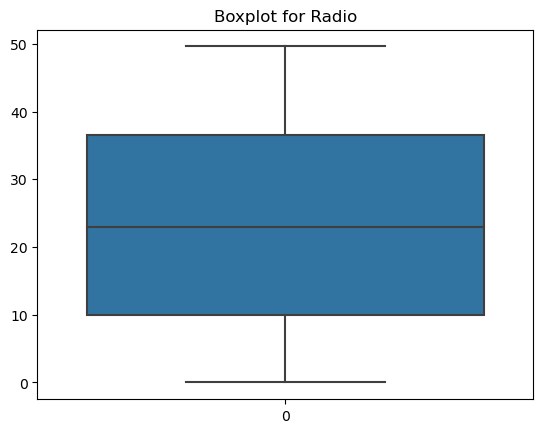

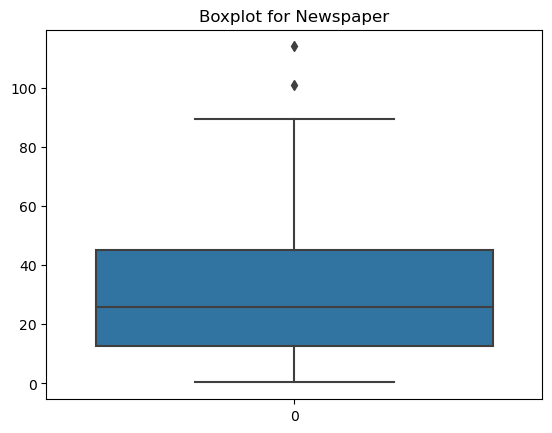

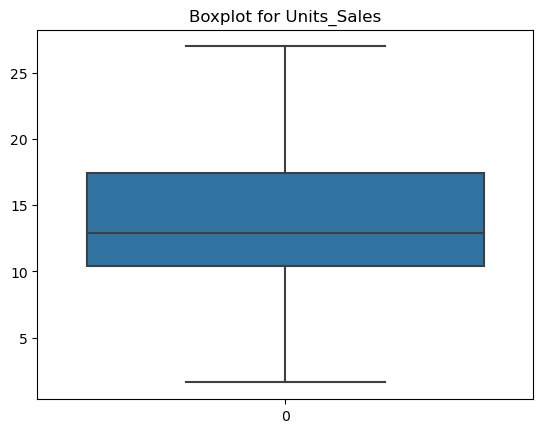

In [14]:
# Visualizing each feature to detect outliers
# with the help of box plot

plt.figure(figsize=(9,5))
for column in ['TV','Radio','Newspaper','Units_Sales']:
    sns.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()
    
    # NOTE: OUTLIERS DETECTED AS A 2 POINTS IN "NEWSPAPER" COLUMN

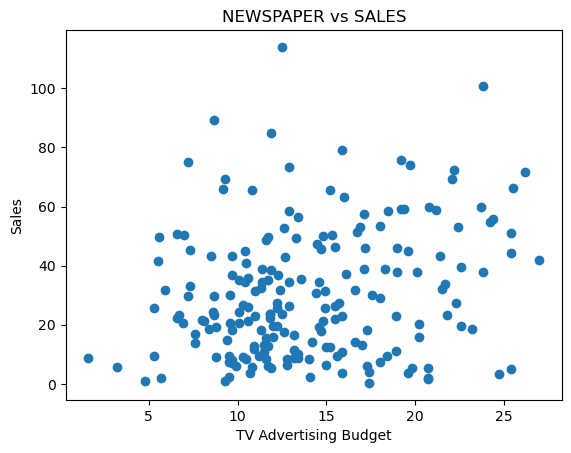

In [15]:
# lets visualize more clearly

plt.scatter( df['Units_Sales'] , df['Newspaper'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('NEWSPAPER vs SALES')
plt.show()



#### 2ND METHOD USING IQR

In [16]:
# DETECING OUTLIER
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

outliers= (df < (Q1-1.5 * IQR)) | (df > (Q3+1.5*IQR))
print(f"OUTLIERS DETECTED : {outliers}")

OUTLIERS DETECTED :         TV  Radio  Newspaper  Units_Sales
0    False  False      False        False
1    False  False      False        False
2    False  False      False        False
3    False  False      False        False
4    False  False      False        False
..     ...    ...        ...          ...
195  False  False      False        False
196  False  False      False        False
197  False  False      False        False
198  False  False      False        False
199  False  False      False        False

[200 rows x 4 columns]


#### REMOVING OUTLIERS

In [17]:
df_cleaned = df[~ ((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))) .any(axis=1)]
df_cleaned

,TV,Radio,Newspaper,Units_Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
df_cleaned.shape                   # THESE TWO POINTS HAS BEEN REMOVED AS AN OUTLIER 

(198, 4)

In [19]:
X=df_cleaned[['TV','Radio','Newspaper']]
y=df_cleaned[['Units_Sales']]

In [20]:
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 )

In [21]:
X_train.shape , X_test.shape 

((158, 3), (40, 3))

In [22]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test)

In [24]:
MAE=mean_absolute_error(y_pred , y_test)

In [25]:
MSE=mean_squared_error(y_pred, y_test)

In [26]:
R_2=r2_score(y_pred , y_test)

In [27]:
RMSE=MSE ** 0.5

In [28]:
print("Model Performance:\n")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared (R2): {R_2*100  :.2f}%")

Model Performance:

Mean Absolute Error (MAE): 1.25
Mean Squared Error (MSE): 2.74
Root Mean Squared Error (RMSE): 1.66
R-squared (R2): 87.38%


In [29]:
#  Predicting for new data 

new_data = [[230.1, 37.8, 69.2]]  # Example: TV, Radio, Newspaper spend
new_prediction = model.predict(new_data)
print(f" Predicted Sales for new data: {new_prediction}")


 Predicted Sales for new data: [[20.6304725]]


C:\Users\Dubai Laptop\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


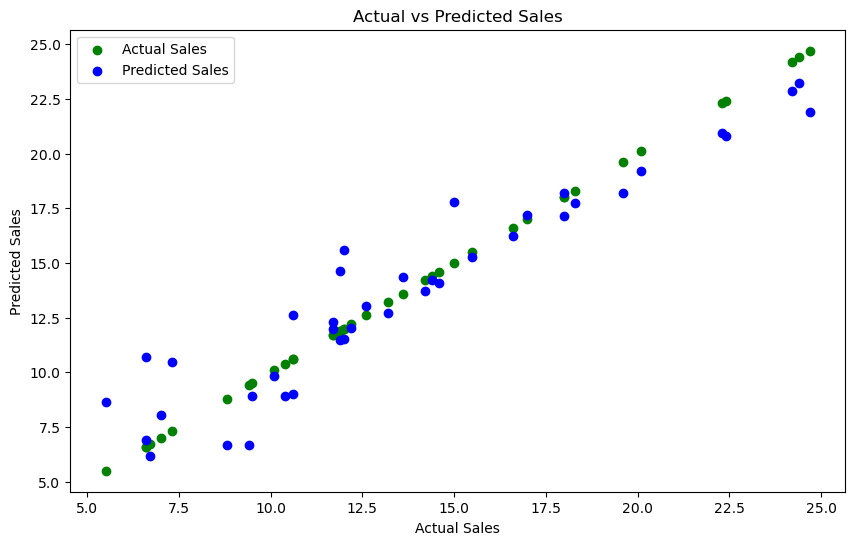

In [30]:
#  Plot the actual vs predicted sales

plt.figure(figsize=(10, 6))
# Plot the actual sales points (y_test)
plt.scatter(y_test, y_test, color='green', label='Actual Sales')
# Plot the predicted sales points (y_pred)
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()